In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_road_injuries = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DVIZ/Project/Road traffic injuries_world.csv")
df_road_injuries.head(5)
#link: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/road-traffic-injuries-age-standardized-death-rates-(15-)-per-100-000-population

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SA_0000001459,"Road traffic crash deaths, age-standardized de...",numeric,WPR,Western Pacific,Country,PLW,Palau,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,---,NaN,NaN,EN,2018-09-06T04:00:00.000Z
1,SA_0000001459,"Road traffic crash deaths, age-standardized de...",numeric,WPR,Western Pacific,Country,KIR,Kiribati,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,EN,2018-09-06T04:00:00.000Z
2,SA_0000001459,"Road traffic crash deaths, age-standardized de...",numeric,EUR,Europe,Country,SWE,Sweden,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,EN,2018-09-06T04:00:00.000Z
3,SA_0000001459,"Road traffic crash deaths, age-standardized de...",numeric,EUR,Europe,Country,ISR,Israel,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,EN,2018-09-06T04:00:00.000Z
4,SA_0000001459,"Road traffic crash deaths, age-standardized de...",numeric,EUR,Europe,Country,CHE,Switzerland,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,EN,2018-09-06T04:00:00.000Z


In [3]:
df_road_injuries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               388 non-null    object 
 1   Indicator                   388 non-null    object 
 2   ValueType                   388 non-null    object 
 3   ParentLocationCode          388 non-null    object 
 4   ParentLocation              388 non-null    object 
 5   Location type               388 non-null    object 
 6   SpatialDimValueCode         388 non-null    object 
 7   Location                    388 non-null    object 
 8   Period type                 388 non-null    object 
 9   Period                      388 non-null    int64  
 10  IsLatestYear                388 non-null    bool   
 11  Dim1 type                   388 non-null    object 
 12  Dim1                        388 non-null    object 
 13  Dim1ValueCode               388 non

In [4]:
x = df_road_injuries[['SpatialDimValueCode','Location','FactValueNumeric']]
x = x.groupby(['SpatialDimValueCode','Location']).agg({'FactValueNumeric':['sum']}).reset_index()
x.columns = ['country_code','country','road_traffic_deaths']
x.sample(10)

,country_code,country,road_traffic_deaths
76,HUN,Hungary,15.9
168,TCD,Chad,73.4
8,AUS,Australia,11.8
158,SRB,Serbia,14.4
181,UKR,Ukraine,23.7
66,GMB,Gambia,117.8
140,PNG,Papua New Guinea,46.0
157,SOM,Somalia,82.1
23,BRA,Brazil,52.9
160,STP,Sao Tome and Principe,115.1


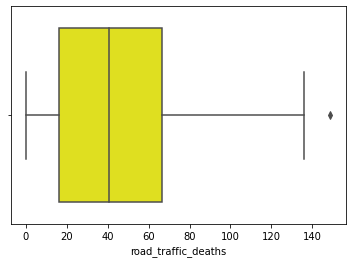

In [5]:
sns.boxplot(data=x,x='road_traffic_deaths',color='yellow')

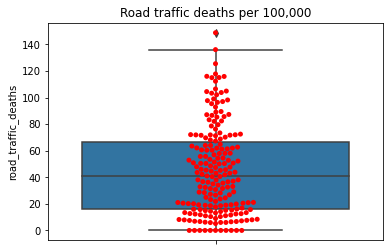

In [6]:
sns.boxplot(y=x['road_traffic_deaths']).set_title('Road traffic deaths per 100,000')
sns.swarmplot(y=x['road_traffic_deaths'],color='red')

In [7]:
fig = px.choropleth(x,
                    locations='country_code',
                    color='road_traffic_deaths',
                    color_continuous_scale='spectral_r',
                    hover_name='country',
                    )

fig.update_layout(title={'text':'Road traffic deaths per 100,000',
                         'xanchor':'center',
                        'yanchor':'top',
                        'x':0.5},coloraxis_colorbar=dict(title='Road traffic death rate'))
fig.show()

In [8]:
fig = px.scatter_geo(x, locations="country_code", color="road_traffic_deaths",
                     hover_name="country", size="road_traffic_deaths",locationmode='ISO-3',color_continuous_scale='spectral_r')
fig.update_layout(title={'text':'Road Traffic Dea',
                         'xanchor':'center',
                        'yanchor':'top',
                        'x':0.5})
fig.show()

In [9]:
df_liver_cirrhosis_deaths = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DVIZ/Project/liver cirrhosis deaths(%).csv")
df_liver_cirrhosis_deaths.head(5)
#link: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/liver-cirrhosis-age-standardized-death-rates-(15-)-per-100-000-population

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SA_0000001741,"Alcohol-attributable fractions (15+), liver ci...",numeric,EMR,Eastern Mediterranean,Country,LBY,Libya,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,EN,2018-09-06T04:00:00.000Z
1,SA_0000001741,"Alcohol-attributable fractions (15+), liver ci...",numeric,EMR,Eastern Mediterranean,Country,YEM,Yemen,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,EN,2018-09-06T04:00:00.000Z
2,SA_0000001741,"Alcohol-attributable fractions (15+), liver ci...",numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,EN,2018-09-06T04:00:00.000Z
3,SA_0000001741,"Alcohol-attributable fractions (15+), liver ci...",numeric,EMR,Eastern Mediterranean,Country,SYR,Syrian Arab Republic,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,EN,2018-09-06T04:00:00.000Z
4,SA_0000001741,"Alcohol-attributable fractions (15+), liver ci...",numeric,EMR,Eastern Mediterranean,Country,KWT,Kuwait,Year,2016,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,EN,2018-09-06T04:00:00.000Z


In [10]:
df_liver_cirrhosis_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               388 non-null    object 
 1   Indicator                   388 non-null    object 
 2   ValueType                   388 non-null    object 
 3   ParentLocationCode          388 non-null    object 
 4   ParentLocation              388 non-null    object 
 5   Location type               388 non-null    object 
 6   SpatialDimValueCode         388 non-null    object 
 7   Location                    388 non-null    object 
 8   Period type                 388 non-null    object 
 9   Period                      388 non-null    int64  
 10  IsLatestYear                388 non-null    bool   
 11  Dim1 type                   388 non-null    object 
 12  Dim1                        388 non-null    object 
 13  Dim1ValueCode               388 non

In [11]:
x = df_liver_cirrhosis_deaths[['SpatialDimValueCode','Location','FactValueNumeric']]
x = x.groupby(['SpatialDimValueCode','Location']).agg({'FactValueNumeric':['sum']}).reset_index()
x.columns = ['country_code','country','liver_cirrhosis_deaths']
x.sample(10)

,country_code,country,liver_cirrhosis_deaths
170,THA,Thailand,114.7
35,COD,Democratic Republic of the Congo,58.7
53,ERI,Eritrea,39.9
135,PAK,Pakistan,16.0
160,STP,Sao Tome and Principe,104.0
99,LBY,Libya,2.4
130,NOR,Norway,118.1
31,CHL,Chile,124.6
153,SLB,Solomon Islands,43.5
144,PRY,Paraguay,105.7


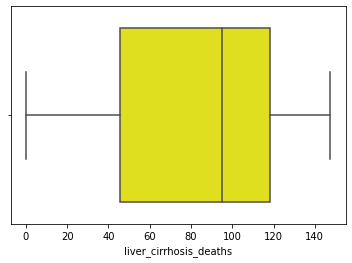

In [12]:
sns.boxplot(data=x,x='liver_cirrhosis_deaths',color='yellow')

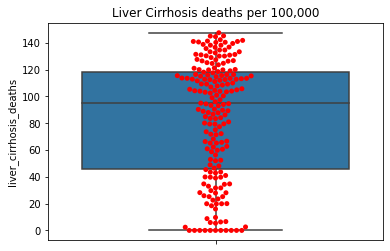

In [13]:
sns.boxplot(y=x['liver_cirrhosis_deaths']).set_title('Liver Cirrhosis deaths per 100,000')
sns.swarmplot(y=x['liver_cirrhosis_deaths'],color='red')

In [14]:
fig = px.choropleth(x,
                    locations='country_code',
                    color='liver_cirrhosis_deaths',
                    color_continuous_scale='spectral_r',
                    hover_name='country',
                    )

fig.update_layout(title={'text':'Liver Cirrhosis Deaths per 100,000',
                         'xanchor':'center',
                        'yanchor':'top',
                        'x':0.5},coloraxis_colorbar=dict(title='Liver cirrhosis death rate'))
fig.show()

In [15]:
fig = px.scatter_geo(x, locations="country_code", color="liver_cirrhosis_deaths",
                     hover_name="country", size="liver_cirrhosis_deaths",locationmode='ISO-3',color_continuous_scale='spectral_r')
fig.show()

In [16]:
df_years_lost = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DVIZ/Project/Alcohol-attributable Years of Life Lost (YLL) score.csv")
df_years_lost.head(5)
#link: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/alcohol-attributable-years-of-life-lost-(yll)-score

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SA_0000001740,Alcohol-attributable Years of Life Lost (YLL) ...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2016,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,EN,2018-09-06T04:00:00.000Z
1,SA_0000001740,Alcohol-attributable Years of Life Lost (YLL) ...,numeric,AFR,Africa,Country,DZA,Algeria,Year,2016,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,EN,2018-09-06T04:00:00.000Z
2,SA_0000001740,Alcohol-attributable Years of Life Lost (YLL) ...,numeric,EMR,Eastern Mediterranean,Country,BHR,Bahrain,Year,2016,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,EN,2018-09-06T04:00:00.000Z
3,SA_0000001740,Alcohol-attributable Years of Life Lost (YLL) ...,numeric,SEAR,South-East Asia,Country,BGD,Bangladesh,Year,2016,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,EN,2018-09-06T04:00:00.000Z
4,SA_0000001740,Alcohol-attributable Years of Life Lost (YLL) ...,numeric,WPR,Western Pacific,Country,BRN,Brunei Darussalam,Year,2016,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,EN,2018-09-06T04:00:00.000Z


In [17]:
df_years_lost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               194 non-null    object 
 1   Indicator                   194 non-null    object 
 2   ValueType                   194 non-null    object 
 3   ParentLocationCode          194 non-null    object 
 4   ParentLocation              194 non-null    object 
 5   Location type               194 non-null    object 
 6   SpatialDimValueCode         194 non-null    object 
 7   Location                    194 non-null    object 
 8   Period type                 194 non-null    object 
 9   Period                      194 non-null    int64  
 10  IsLatestYear                194 non-null    bool   
 11  Dim1 type                   0 non-null      float64
 12  Dim1                        0 non-null      float64
 13  Dim1ValueCode               0 non-n

In [18]:
x = df_years_lost[['SpatialDimValueCode','Location','FactValueNumeric']]
x = x.groupby(['SpatialDimValueCode','Location']).agg({'FactValueNumeric':['sum']}).reset_index()
x.columns = ['country_code','country','years_lost_score']
x.sample(10)

,country_code,country,years_lost_score
158,SRB,Serbia,3.0
149,SAU,Saudi Arabia,1.0
43,CYP,Cyprus,2.0
99,LBY,Libya,1.0
142,PRK,Democratic People's Republic of Korea,3.0
23,BRA,Brazil,4.0
150,SDN,Sudan,1.0
42,CUB,Cuba,2.0
131,NPL,Nepal,2.0
10,AZE,Azerbaijan,3.0


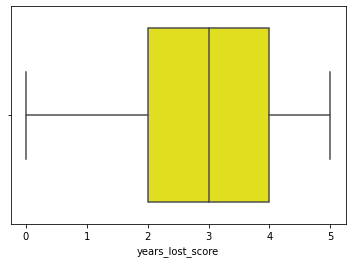

In [19]:
sns.boxplot(data=x,x='years_lost_score',color='yellow')

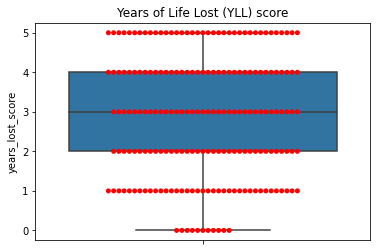

In [20]:
sns.boxplot(y=x['years_lost_score']).set_title('Years of Life Lost (YLL) score')
sns.swarmplot(y=x['years_lost_score'],color='red')

In [21]:
fig = px.choropleth(x,
                    locations='country_code',
                    color='years_lost_score',
                    color_continuous_scale='spectral_r',
                    hover_name='country',
                    )

fig.update_layout(title={'text':'Years Lost Score',
                         'xanchor':'center',
                        'yanchor':'top',
                        'x':0.5},coloraxis_colorbar=dict(title='Years lost score'))
fig.show()

In [22]:
fig = px.scatter_geo(x, locations="country_code", color="years_lost_score",
                     hover_name="country", size="years_lost_score",locationmode='ISO-3',color_continuous_scale='spectral_r')
fig.show()